user_defined
	50%:         0.36 mm
	Average:     0.42 mm
	90%:         0.86 mm
	Maximum:     1.76 mm
emstandard_opt3
	50%:         0.32 mm
	Average:     0.42 mm
	90%:         0.92 mm
	Maximum:     2.20 mm
emlivermore
	50%:         0.35 mm
	Average:     0.44 mm
	90%:         0.94 mm
	Maximum:     2.26 mm
emlivermore_polar
	50%:         0.35 mm
	Average:     0.44 mm
	90%:         0.94 mm
	Maximum:     2.27 mm
empenelope
	50%:         0.35 mm
	Average:     0.44 mm
	90%:         0.94 mm
	Maximum:     2.34 mm


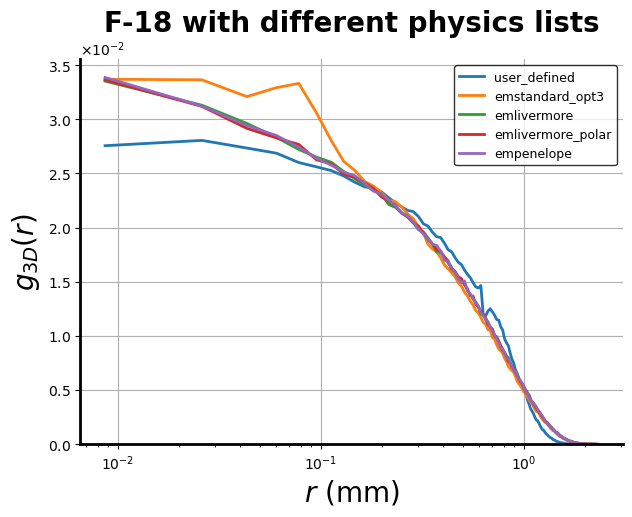

In [8]:
from analysis import PRAnalysis, aesthetic_plot
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 5))
plt.title(f"F-18 with different physics lists")
plt.xlabel(r"$r$ (mm)")
plt.ylabel(r"$g_{3D}(r)$")
for physics in ["user_defined", "emstandard_opt3", "emlivermore", "emlivermore_polar", "empenelope"]:
    r = PRAnalysis(physics, f"RESULTS/physicsGATE/Water/GATE93_xyz/{physics}.dat", SIZE=[201]*3, STEP=[1e-3]*3)
    print(physics)
    print(f"\t50%:     {r.interpol_G3D(0.5)*10:>8.2f} mm")
    print(f"\tAverage: {np.mean(r.rp)*10:>8.2f} mm")
    print(f"\t90%:     {r.interpol_G3D(0.9)*10:>8.2f} mm")
    print(f"\tMaximum: {np.max(r.rp)*10:> 8.2f} mm")
    plt.plot(r.rplot*10, r.g3D, label=physics)
    # plt.plot(r.rplot*10, r.aPSF3D_sin, label=physics)
plt.xscale("log")
plt.legend()
ax, leg = aesthetic_plot()
ax.set_ylim(bottom=0)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-4, -2))
ax.yaxis.set_major_formatter(formatter)
plt.show()